In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv("/kaggle/input/heart-failure-prediction/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Distribution plot for numeric values

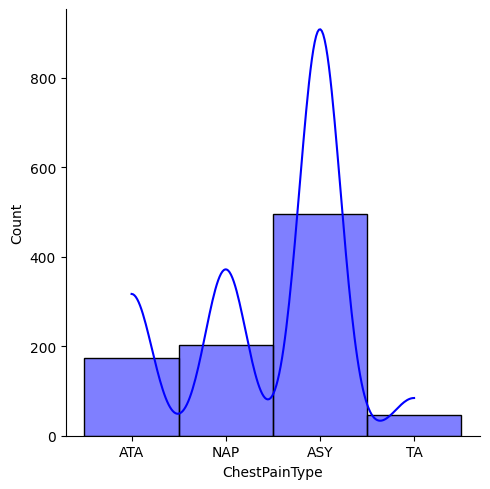

In [3]:
sns.displot(df['ChestPainType'],kde = True, color = 'blue') #kde=curve line

<Axes: xlabel='Age', ylabel='Density'>

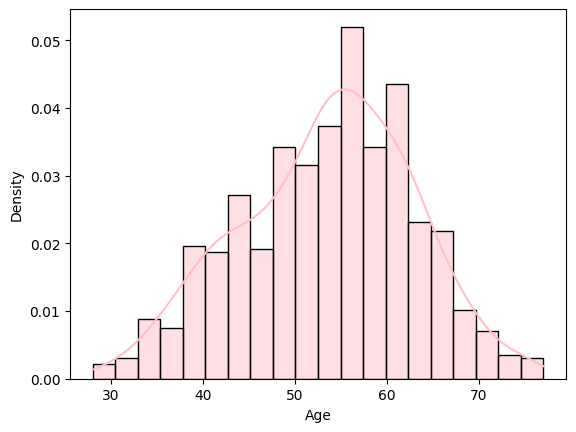

In [13]:
 #distplot used for multiple parameters
sns.histplot(df["Age"], kde=True, stat="density",bins=20,color='pink')

## Pie Charts for Categorical Columns

In [13]:
df.groupby("Sex").size()

Sex
F    193
M    725
dtype: int64

<Axes: >

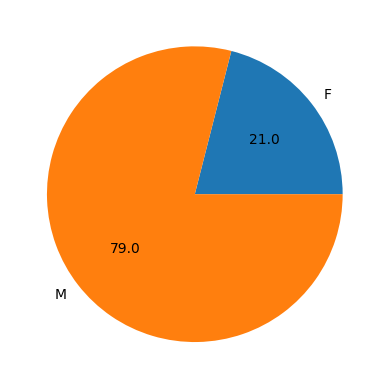

In [16]:
df.groupby("Sex").size().plot(kind= 'pie', autopct = '%.2f') #for % auto punctuation upto .2 decimal

<Axes: >

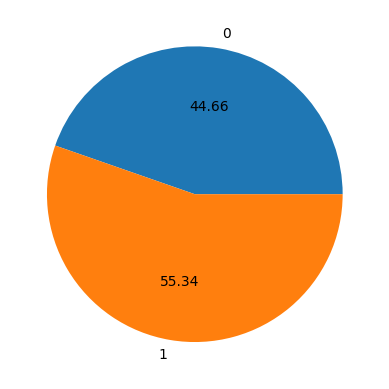

In [18]:
df.groupby("HeartDisease").size().plot(kind= 'pie', autopct = '%.2f')

## Violin Plot
###### A seaborn violinplot displays a continuous distribution's probability density with a combination of a box plot and a rotated kernel density plot on each side.

<Axes: xlabel='HeartDisease', ylabel='Sex'>

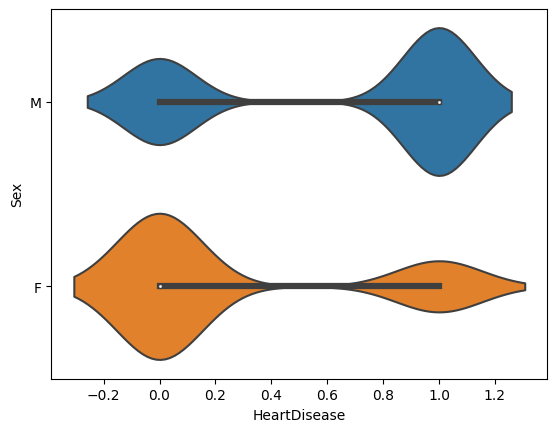

In [19]:
sns.violinplot(y = df['Sex'], x = df['HeartDisease'])
# M has more chances of heart disease +ve which is 1

<Axes: xlabel='HeartDisease', ylabel='Age'>

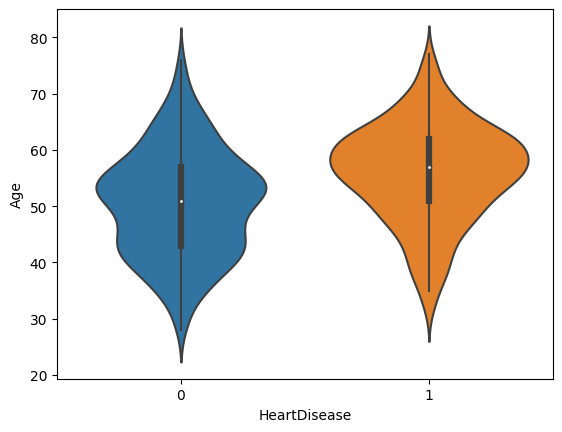

In [21]:
sns.violinplot(y= df['Age'], x = df['HeartDisease'])
#around age 60 many have heart disease
#around 53 many do not have heart disease

## Correlation
#### more closer to 1, the better correlation
#### -ve correlation means inversely proportional

###### A correlation heatmap visually represents the correlation matrix of a dataset

In [34]:
float_df= df.select_dtypes(include = ["int",'float']) #strings excluded, since w strings corr of int not possible
float_df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


<Axes: >

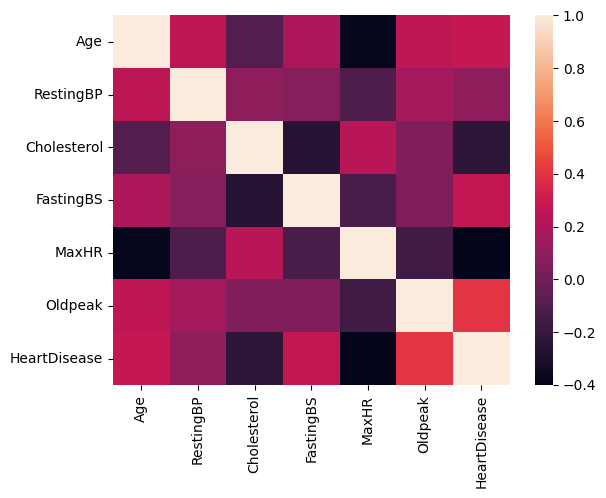

In [37]:
sns.heatmap(float_df.corr())

## Joint plot

#### A correlation jointplot in seaborn displays the joint distribution of two variables with a scatterplot and regression line

In [38]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


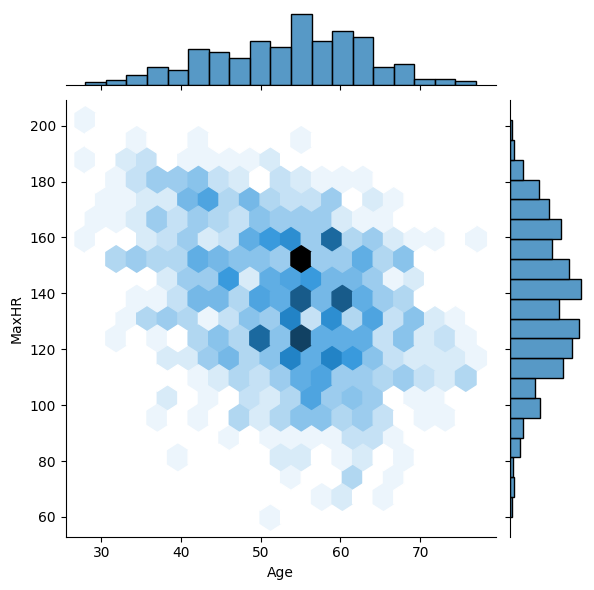

In [15]:
sns.jointplot(x='Age',y='MaxHR', kind = 'hex', data= df)

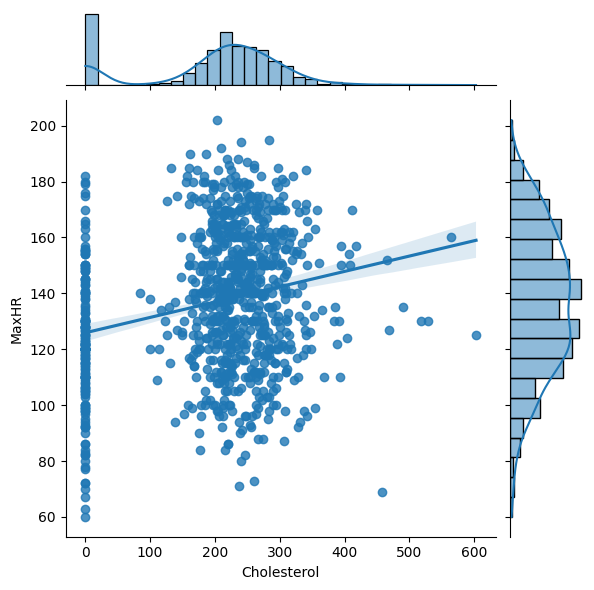

In [17]:
sns.jointplot(x = 'Cholesterol' , y = 'MaxHR', data = df, kind = 'reg')

## Pair Plot


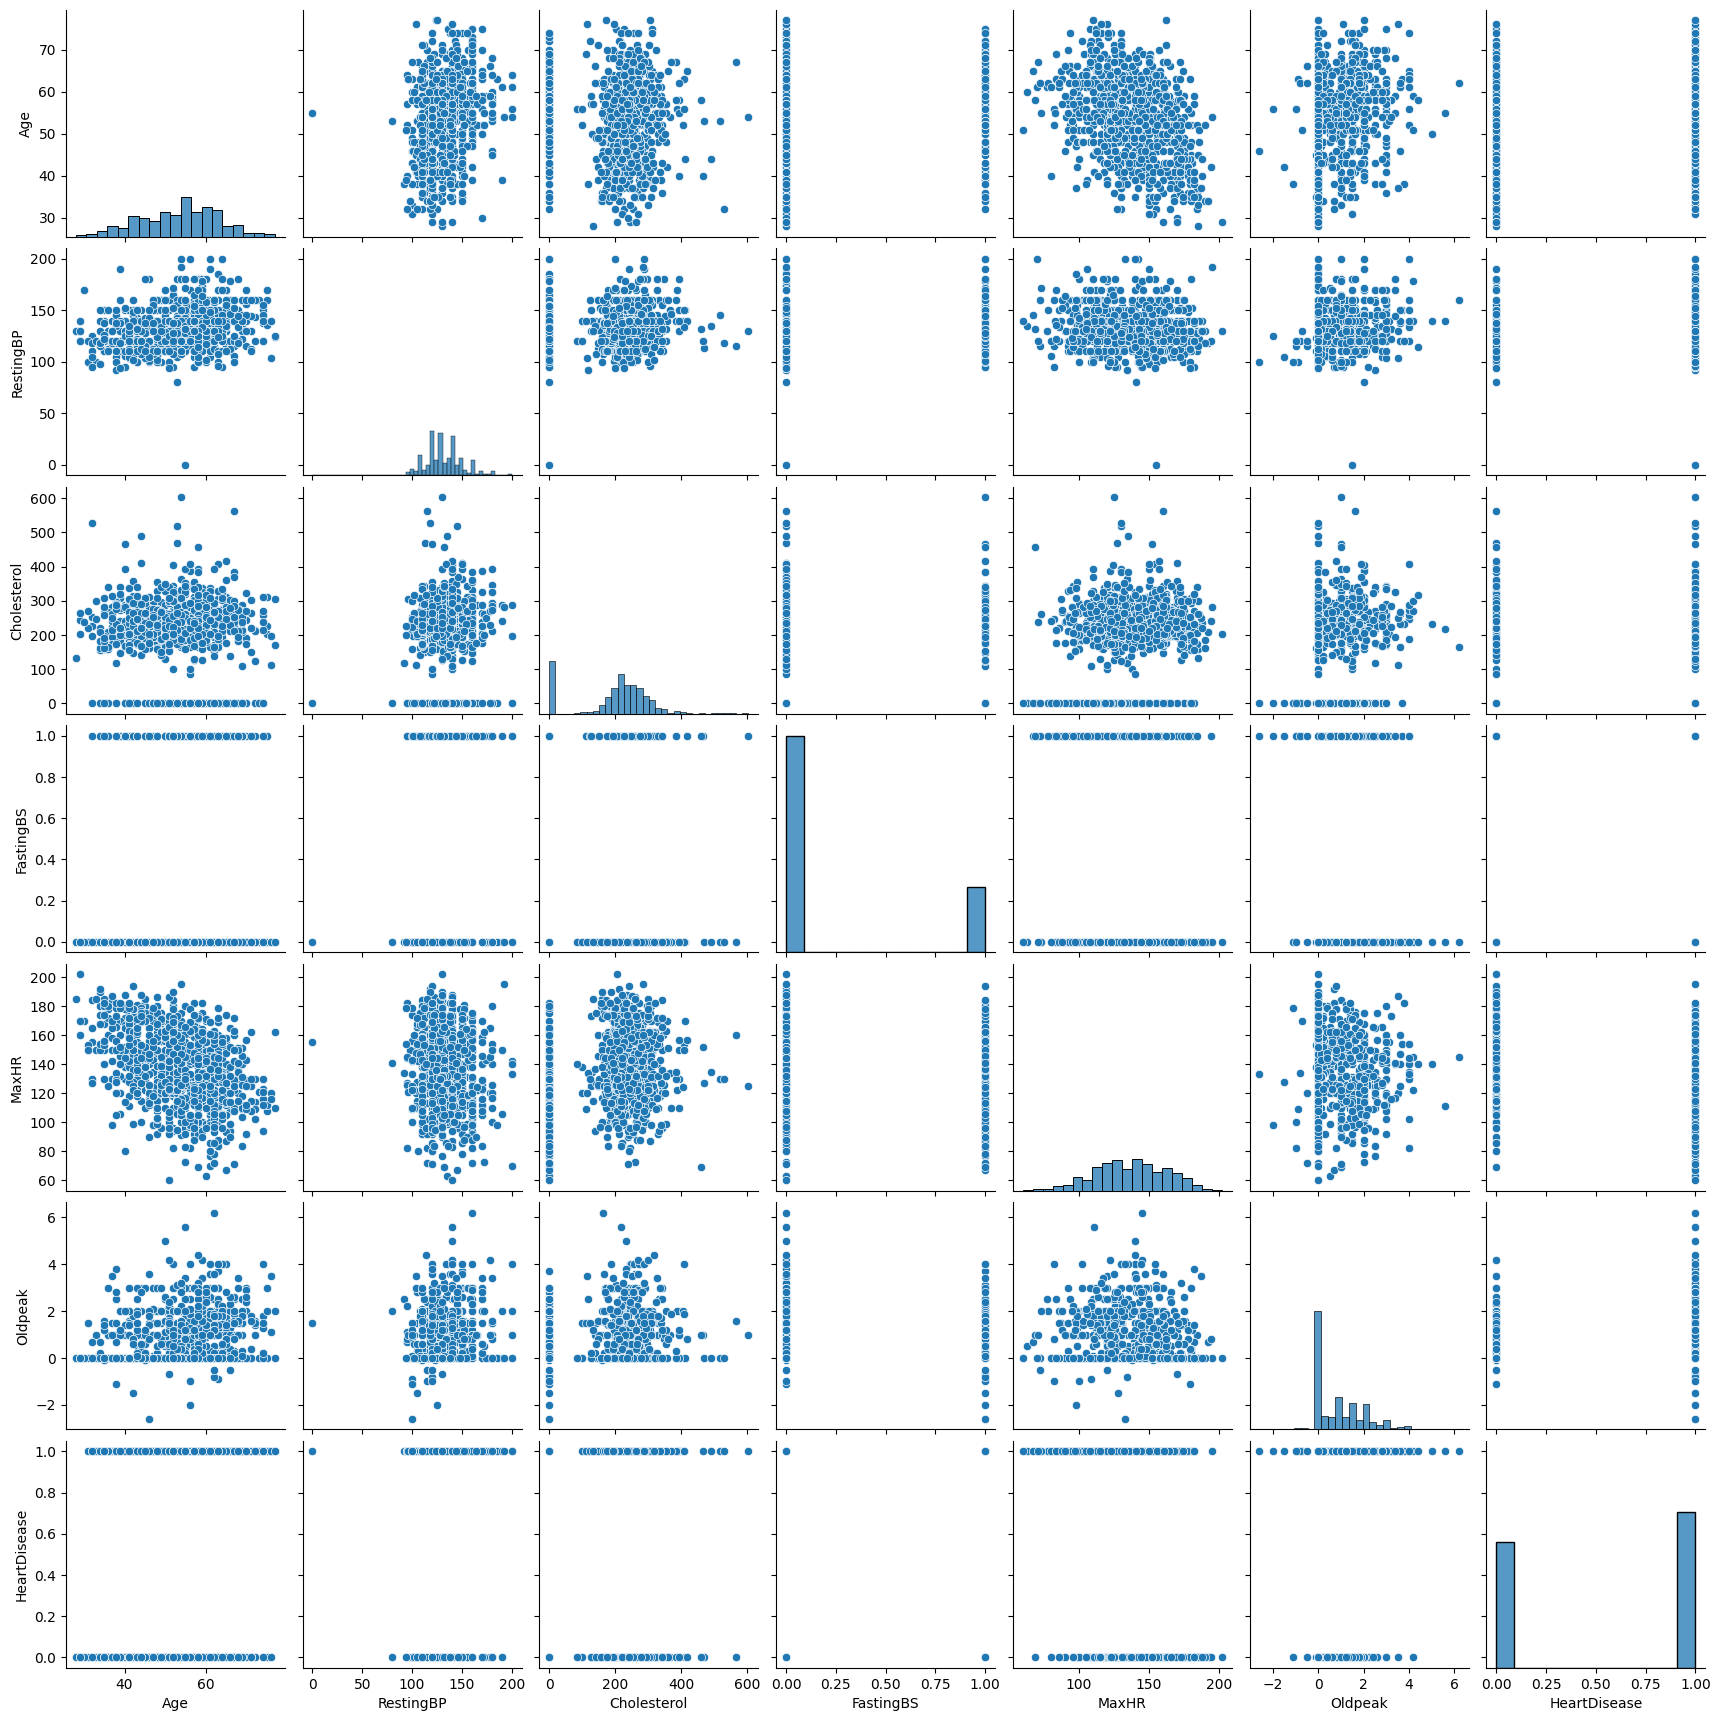

In [16]:
sns.pairplot(df)